# Une mesure de l'inflation liée aux journaux - Projet Python pour la Data-science

### Auteurs : Lise Marchal, Raphaël Pereira et Raphaël Zambélli--Palacio

Ce notebook a pour objectif de présenter les travaux de recherche effectués dans le cadre du cours de Projet Python pour la data-science de la 2A ENSAE.

## Problématique :

Les périodes caractérisées par un taux d'inflation élevé coïcident-elles avec celles de traitement médiatique accru de cette thématique ?


# 1- Statistiques descriptives des mesures d'inflation sur la période

## 1.1- Récupération et nettoyage des données d'inflation de la FED de Saint-Louis

### 1.1.1- Utilisation de l'API de la FRED:

lien documentation pour obtenir les séries d'inflation: https://fred.stlouisfed.org/docs/api/fred/series_observations.html

In [1]:
# Création de l'URL permettant d'accéder à la série:  Consumer Price Index for All Urban Consumers: All Items in U.S. City Average

api_root="https://api.stlouisfed.org/fred/series/observations"
series_id="CPIAUCNS"
api_key="69c5f0ad2e33d8dac6297c8b3f25bb1f"
file_type="json"

url_api = (
    f"{api_root}?"
    + f"series_id={series_id}&"
    + f"api_key={api_key}&"
    + f"file_type={file_type}"
)

In [ ]:
#Requête

import requests

req = requests.get(url_api)
wb = req.json()

In [3]:
#Première exploration des données
for observation in wb["observations"]:
    print(f"Date: {observation['date']}, Valeur: {observation['value']}")

Date: 1913-01-01, Valeur: 9.800
Date: 1913-02-01, Valeur: 9.800
Date: 1913-03-01, Valeur: 9.800
Date: 1913-04-01, Valeur: 9.800
Date: 1913-05-01, Valeur: 9.700
Date: 1913-06-01, Valeur: 9.800
Date: 1913-07-01, Valeur: 9.900
Date: 1913-08-01, Valeur: 9.900
Date: 1913-09-01, Valeur: 10.000
Date: 1913-10-01, Valeur: 10.000
Date: 1913-11-01, Valeur: 10.100
Date: 1913-12-01, Valeur: 10.000
Date: 1914-01-01, Valeur: 10.000
Date: 1914-02-01, Valeur: 9.900
Date: 1914-03-01, Valeur: 9.900
Date: 1914-04-01, Valeur: 9.800
Date: 1914-05-01, Valeur: 9.900
Date: 1914-06-01, Valeur: 9.900
Date: 1914-07-01, Valeur: 10.000
Date: 1914-08-01, Valeur: 10.200
Date: 1914-09-01, Valeur: 10.200
Date: 1914-10-01, Valeur: 10.100
Date: 1914-11-01, Valeur: 10.200
Date: 1914-12-01, Valeur: 10.100
Date: 1915-01-01, Valeur: 10.100
Date: 1915-02-01, Valeur: 10.000
Date: 1915-03-01, Valeur: 9.900
Date: 1915-04-01, Valeur: 10.000
Date: 1915-05-01, Valeur: 10.100
Date: 1915-06-01, Valeur: 10.100
Date: 1915-07-01, Valeur

In [ ]:
#données imbriquées?
print(req.content[:1000])
# je dirais que oui, metadata


b'{"realtime_start":"2024-11-13","realtime_end":"2024-11-13","observation_start":"1600-01-01","observation_end":"9999-12-31","units":"lin","output_type":1,"file_type":"json","order_by":"observation_date","sort_order":"asc","count":1342,"offset":0,"limit":100000,"observations":[{"realtime_start":"2024-11-13","realtime_end":"2024-11-13","date":"1913-01-01","value":"9.800"},{"realtime_start":"2024-11-13","realtime_end":"2024-11-13","date":"1913-02-01","value":"9.800"},{"realtime_start":"2024-11-13","realtime_end":"2024-11-13","date":"1913-03-01","value":"9.800"},{"realtime_start":"2024-11-13","realtime_end":"2024-11-13","date":"1913-04-01","value":"9.800"},{"realtime_start":"2024-11-13","realtime_end":"2024-11-13","date":"1913-05-01","value":"9.700"},{"realtime_start":"2024-11-13","realtime_end":"2024-11-13","date":"1913-06-01","value":"9.800"},{"realtime_start":"2024-11-13","realtime_end":"2024-11-13","date":"1913-07-01","value":"9.900"},{"realtime_start":"2024-11-13","realtime_end":"202

### 1.1.2- Nettoyage des données

#### Création et première exploration du dataframe

In [4]:
# Import des bibliothèques utiles: 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Création d'un dataframe à partir du fichier json

CPI_Urban=pd.json_normalize(wb["observations"]) #nested data?

In [15]:
CPI_Urban.head()

,date,value
0,1913-01-01,9.800
1,1913-02-01,9.800
2,1913-03-01,9.800
3,1913-04-01,9.800
4,1913-05-01,9.700


In [16]:
# On ne garde que les deux dernières colonnes
CPI_Urban = CPI_Urban[["date", "value"]]
CPI_Urban.head()


,date,value
0,1913-01-01,9.800
1,1913-02-01,9.800
2,1913-03-01,9.800
3,1913-04-01,9.800
4,1913-05-01,9.700


In [ ]:
# Infos générales
CPI_Urban.axes

[RangeIndex(start=0, stop=1342, step=1),
 Index(['date', 'value'], dtype='object')]

In [19]:
# Infos générales: types
CPI_Urban.dtypes

date     object
value    object
dtype: object

#### Traitement des values

In [29]:
CPI_Urban["value"] = CPI_Urban["value"].astype(float)

#### Traitement des dates

In [21]:
CPI_Urban['date'] = pd.to_datetime(CPI_Urban['date'])
CPI_Urban['year'] = CPI_Urban['date'].dt.year
CPI_Urban['month'] = CPI_Urban['date'].dt.month

CPI_Urban.head(15)

,date,value,year,month
0,1913-01-01,9.800,1913,1
1,1913-02-01,9.800,1913,2
2,1913-03-01,9.800,1913,3
3,1913-04-01,9.800,1913,4
4,1913-05-01,9.700,1913,5
5,1913-06-01,9.800,1913,6
6,1913-07-01,9.900,1913,7
7,1913-08-01,9.900,1913,8
8,1913-09-01,10.000,1913,9
9,1913-10-01,10.000,1913,10


#### Création de la variable pourcentage d'inflation annuelle: 

Le jeu de données se présente en effet sous la forme d'indices avec une base 100 en 1983. 
Limite: Il n'est pas idéal d'avoir la date de la base postérieure à la période étudiée.  

In [27]:
index_14=CPI_Urban.index[CPI_Urban['date'] == '1914-01-01'][0]
index_end=CPI_Urban.index[CPI_Urban['date'] == '1963-01-01'][0]

print(index_14, index_end)


12 600


In [30]:
#On ne calcule le taux d'inflation annuel que pour la période considérée
CPI_Urban['inf_an']=0

for i in range(index_14,index_end+1):
    b=CPI_Urban.loc[i,'value']
    a=CPI_Urban.loc[i-12,'value']
    CPI_Urban.at[i, 'inf_an']=((b-a)/a)*100

  
CPI_Urban.head(20)

C:\Users\lisem\AppData\Local\Temp\ipykernel_14812\3993219406.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.0408163265306047' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  CPI_Urban.at[i, 'inf_an']=((b-a)/a)*100


,date,value,year,month,inf_an
0,1913-01-01,9.8,1913,1,0.000000
1,1913-02-01,9.8,1913,2,0.000000
2,1913-03-01,9.8,1913,3,0.000000
3,1913-04-01,9.8,1913,4,0.000000
4,1913-05-01,9.7,1913,5,0.000000
5,1913-06-01,9.8,1913,6,0.000000
6,1913-07-01,9.9,1913,7,0.000000
7,1913-08-01,9.9,1913,8,0.000000
8,1913-09-01,10.0,1913,9,0.000000
9,1913-10-01,10.0,1913,10,0.000000


#### Création d'un sous-tableau de la période considérée

In [31]:
CPI_sub = CPI_Urban[(CPI_Urban['year'] > 1913) & (CPI_Urban['year'] < 1963)]
CPI_sub.head(10)
CPI_sub.tail(10)

,date,value,year,month,inf_an
590,1962-03-01,30.1,1962,3,1.006711
591,1962-04-01,30.2,1962,4,1.342282
592,1962-05-01,30.2,1962,5,1.342282
593,1962-06-01,30.2,1962,6,1.342282
594,1962-07-01,30.3,1962,7,1.000000
595,1962-08-01,30.3,1962,8,1.337793
596,1962-09-01,30.4,1962,9,1.333333
597,1962-10-01,30.4,1962,10,1.333333
598,1962-11-01,30.4,1962,11,1.333333
599,1962-12-01,30.4,1962,12,1.333333


## 1.2- Traitement des données

### 1.2.1- Premières statistiques descriptives sur l'inflation pendant la période

In [32]:
CPI_sub['inf_an'].describe()

count    588.000000
mean       2.517532
std        6.607607
min      -15.789474
25%       -0.578035
50%        1.449275
75%        3.764927
max       23.668639
Name: inf_an, dtype: float64

### 1.2.2- Identification de périodes d'intérêt

#### Identification des périodes d'inflation négative

In [34]:
# Création d'une indicatrice inf_neg qui prend la valeur 1 si l'inflation est négative et 0 sinon
CPI_sub['inf_neg']=0
CPI_sub.loc[CPI_sub['inf_an'] < 0, 'inf_neg'] = 1
CPI_sub.head(30)

C:\Users\lisem\AppData\Local\Temp\ipykernel_14812\1995190950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPI_sub['inf_neg']=0


,date,value,year,month,inf_an,inf_neg
12,1914-01-01,10.0,1914,1,2.040816,0
13,1914-02-01,9.9,1914,2,1.020408,0
14,1914-03-01,9.9,1914,3,1.020408,0
15,1914-04-01,9.8,1914,4,0.000000,0
16,1914-05-01,9.9,1914,5,2.061856,0
17,1914-06-01,9.9,1914,6,1.020408,0
18,1914-07-01,10.0,1914,7,1.010101,0
19,1914-08-01,10.2,1914,8,3.030303,0
20,1914-09-01,10.2,1914,9,2.000000,0
21,1914-10-01,10.1,1914,10,1.000000,0


In [ ]:
# Premières informations sur les périodes d'inflation négatives: 
CPI_neg=CPI_sub[CPI_sub['inf_neg'] == 1]
CPI_neg['inf_an'].describe()


count    158.000000
mean      -4.149776
std        4.029451
min      -15.789474
25%       -7.680995
50%       -2.228430
75%       -0.980392
max       -0.371747
Name: inf_an, dtype: float64

<Axes: xlabel='date', ylabel='inf_neg'>

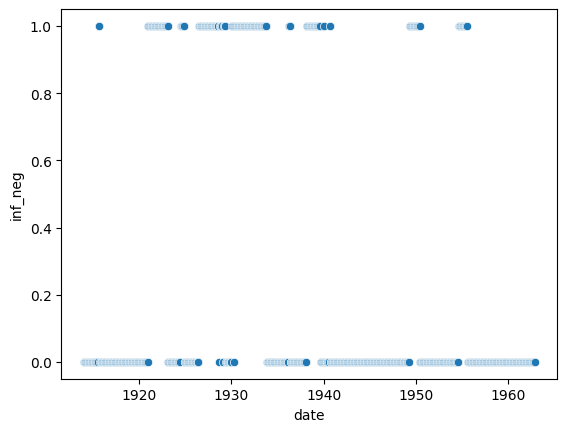

In [45]:
# Graphique simple pour visualiser les périodes
import seaborn as sns
sns.scatterplot(x=CPI_sub["date"], y=CPI_sub["inf_neg"])